# **1) Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score
from google.colab import files


## **2) Import** **Dataset**

In [ ]:
uploaded = files.upload()


Saving boston.csv to boston.csv


In [ ]:
df = pd.read_csv('boston.csv')


In [ ]:
#نشوف شكل data
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#check for the missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#the num of rows an columns
df.shape

(506, 14)

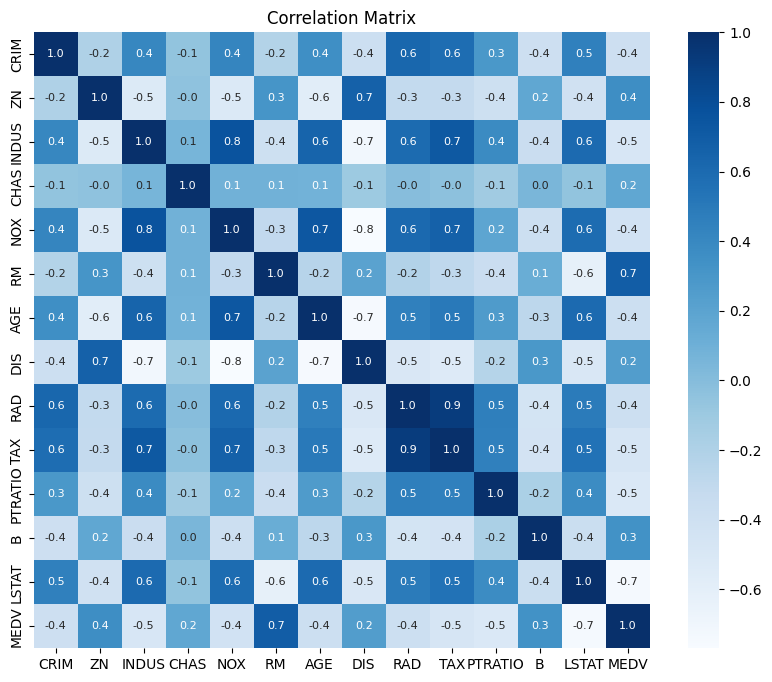

In [ ]:
#find the correlation between the features of the data
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar=True , square=True , fmt='.1f', annot=True , annot_kws={'size':8} , cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_target = corr['MEDV'].sort_values(ascending=False)
corr_target

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


In [ ]:
X = df.drop('MEDV', axis = 1)
Y = df['MEDV']

# **3) preprocessing the data**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

# **4) Train ML**

1)linear regression

In [ ]:
#make the model linear regression
model_lin = LinearRegression()
model_lin.fit(X_train, Y_train)


LinearRegression()

In [ ]:
#توقع لبقيم على Test Set
Y_pred_lR= model_lin.predict(X_test)

In [ ]:
#evaluation linear regression
rmse_lR = np.sqrt(mean_squared_error(Y_test, Y_pred_lR))
r2_lR = r2_score(Y_test, Y_pred_lR)

print("Linear Regression")
print('RMSE:', rmse_lR)
print('R2:', r2_lR)

Linear Regression
RMSE: 4.928602182665336
R2: 0.668759493535632


2) Ridge Regression

In [ ]:
#make the model Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, Y_train)

y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
r2_ridge = r2_score(Y_test, y_pred_ridge)

print("Ridge Regression")
print('RMSE:', rmse_ridge)
print('R2:', r2_ridge)


Ridge Regression
RMSE: 4.930977333547211
R2: 0.6684401592810273


In [ ]:
#compare between Linear Regression & Ridge Regression
results = pd.DataFrame({
    "Model": ["Linear", "Ridge"],
    "RMSE": [rmse_lR, rmse_ridge ],
   # "R2 Score": [r2_lR, r2_ridge ]
})

results

,Model,RMSE
0,Linear,4.928602
1,Ridge,4.930977


Model Evaluating (Ridge Regression)

In [ ]:
#check overfitting
y_train_pred = model_ridge.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 4.6521785832944955
Test RMSE: 4.930977333547211


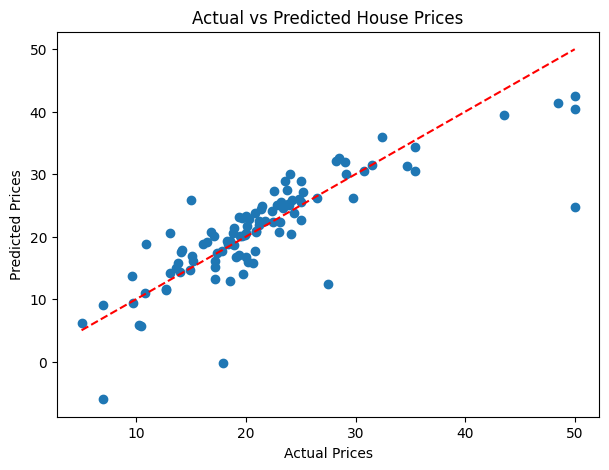

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(Y_test, y_pred_ridge)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

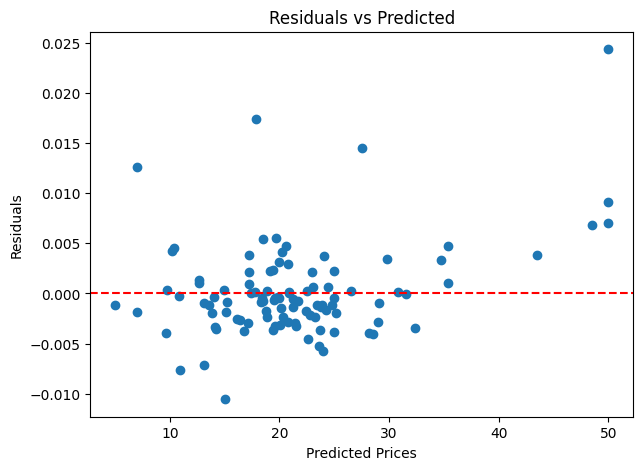

In [ ]:
residuals = Y_test - y_pred_ridge

plt.figure(figsize=(7,5))
plt.scatter(y_pred_ridge, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()